In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from castle.algorithms import GraNDAG
from castle.common import GraphDAG

In [111]:
dataset = pd.read_csv("data/满意度因果发现.csv").fillna(0)
dataset.head()

,体重,内镜医生满意度,如果有，那么是出现了嗜乏力,如果有，那么是出现了嗜嗜睡,如果有，那么是出现了头头昏,如果有，那么是出现了头头晕,如果有，那么是出现了头头痛,如果有，那么是出现了恶呕吐次数,如果有，那么是出现了恶恶心,如果有，那么是出现了腹腹痛,...,有无手术史,有无既往史,有无晕动史,身高,镇痛药用药量,镇静药名称,镇静药用药量,镇静追加次数,麻醉医生满意度,整体满意度
0,-0.110343,8,0,0,0,0,0,0,0,0,...,0,0,0,-0.099997,7.0,0,1.500000,0,9,4.0
1,0.039858,9,0,0,0,0,0,0,1,0,...,0,0,0,-0.084272,7.0,0,1.500000,0,9,3.0
2,0.137488,7,0,0,0,1,0,0,0,0,...,0,0,0,0.072980,7.0,1,0.246386,2,8,3.0
3,-0.035243,8,0,0,0,1,0,2,0,0,...,0,1,0,-0.162898,7.0,1,0.150000,0,8,2.0
4,-0.035243,7,0,0,0,1,0,0,0,0,...,0,0,0,-0.068547,7.0,1,0.150000,0,7,3.0


In [112]:
dataset = dataset.to_numpy(dtype=float)

In [113]:
dim = dataset.shape[1]
causal_discovery_algo = GraNDAG(input_dim=dim, jac_thresh=False)
causal_discovery_algo.learn(dataset)

2023-06-09 10:12:06,629 - /Users/shizumu/Library/Python/3.9/lib/python/site-packages/castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.
Training Iterations: 100%|██████████| 10000/10000 [00:55<00:00, 180.65it/s]


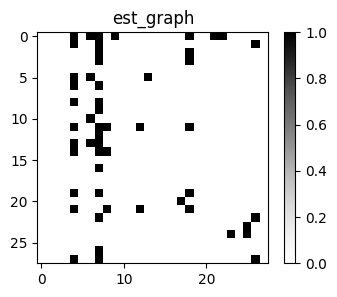

In [114]:
graph = GraphDAG(causal_discovery_algo.causal_matrix)
print(graph)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]


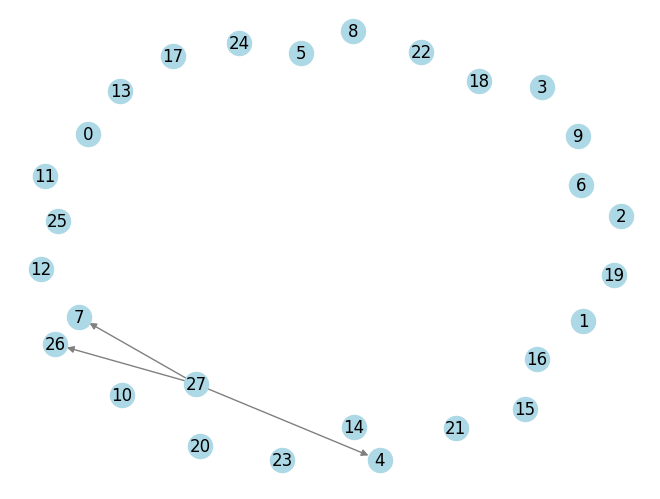

In [116]:
# labels = ["体重","内镜医生满意度","嗜乏力","嗜睡","头头昏","头头晕","头头痛","呕吐次数","恶心","腹腹痛","腹腹胀","年龄","性别","头晕头昏头痛","恶心呕吐","吸烟","酗酒","有无PONV","有无手术史","有无既往史","有无晕动史","身高","镇痛药用药量","镇静药名称","镇静药用药量","镇静追加次数","麻醉医生满意度","整体满意度"]
labels = np.arange(0, dim)
adjacency_matrix = causal_discovery_algo.causal_matrix
print(adjacency_matrix[dim - 1])
graph = nx.DiGraph()
graph.add_nodes_from(labels)
# 添加边
for i in range(dim):
    for j in range(dim):
        if adjacency_matrix[dim - 1][j] != 0:
            graph.add_edge(labels[dim - 1], labels[j])

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.axis('off')
plt.show()